In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [2]:
df = pd.read_csv("/data/cleaned/processed_raw_CareerMapping_with_scores.csv")

In [3]:
X = df.drop(['Role', 'Role_encoded'], axis=1)

In [4]:
y = df['Role_encoded']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
print(f"Số lượng mẫu ban đầu của tập Train: {Counter(y_train)}")

Số lượng mẫu ban đầu của tập Train: Counter({0: 851, 11: 445, 12: 430, 13: 424, 2: 417, 5: 417, 3: 406, 7: 392, 8: 389, 14: 387, 15: 386, 9: 381, 6: 379, 1: 379, 4: 377, 10: 362})


In [7]:
smote = SMOTE(random_state=42)

In [8]:
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [9]:
print(f"Số lượng mẫu sau khi SMOTE: {Counter(y_train_resampled)}")

Số lượng mẫu sau khi SMOTE: Counter({3: 851, 8: 851, 13: 851, 7: 851, 15: 851, 14: 851, 4: 851, 2: 851, 6: 851, 11: 851, 5: 851, 1: 851, 9: 851, 12: 851, 0: 851, 10: 851})


In [10]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)
y_pred = rf_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)

In [11]:
print(f"Random Forest's acc: {acc}")

Random Forest's acc: 1.0


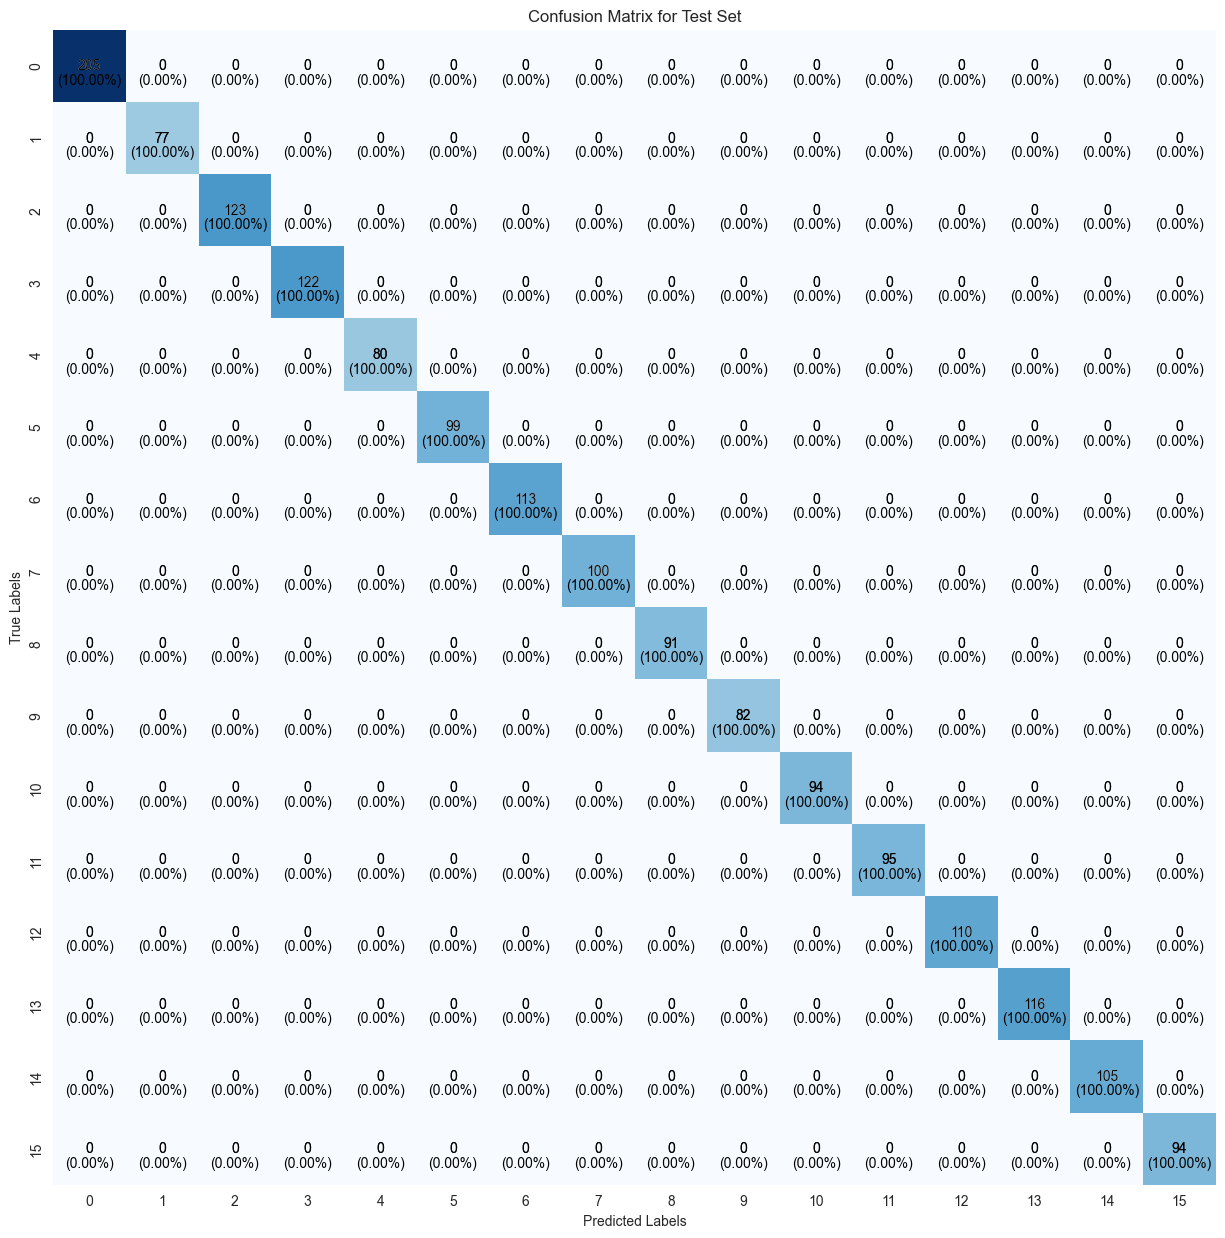

In [12]:
conf_matrix = confusion_matrix(y_test, y_pred)
row_sums = conf_matrix.sum(axis=1, keepdims=True)
conf_matrix_percent = conf_matrix / row_sums * 100
#print(conf_matrix_percent)

plt.figure(figsize=(15, 15))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)

for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j + 0.5, i + 0.5, f"{conf_matrix[i, j]}",
                 horizontalalignment="center",
                 verticalalignment="center", color="black", fontsize=10)
        plt.text(j + 0.5, i + 0.7, f"({conf_matrix_percent[i, j]:.2f}%)",
                 horizontalalignment="center",
                 verticalalignment="center", color="black", fontsize=10)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Test Set')
plt.show()

In [13]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       205
           1       1.00      1.00      1.00        77
           2       1.00      1.00      1.00       123
           3       1.00      1.00      1.00       122
           4       1.00      1.00      1.00        80
           5       1.00      1.00      1.00        99
           6       1.00      1.00      1.00       113
           7       1.00      1.00      1.00       100
           8       1.00      1.00      1.00        91
           9       1.00      1.00      1.00        82
          10       1.00      1.00      1.00        94
          11       1.00      1.00      1.00        95
          12       1.00      1.00      1.00       110
          13       1.00      1.00      1.00       116
          14       1.00      1.00      1.00       105
          15       1.00      1.00      1.00        94

    accuracy                           1.00      1706
   macro avg       1.00   

In [14]:
feature_imp = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

In [15]:
print("\n--- Top 5 Yếu tố quan trọng nhất ---")
print(feature_imp.head(5))


--- Top 5 Yếu tố quan trọng nhất ---
Networking                       0.057554
Distributed Computing Systems    0.057023
Software Development             0.056952
Business Analysis                0.056923
Database Fundamentals            0.056247
dtype: float64


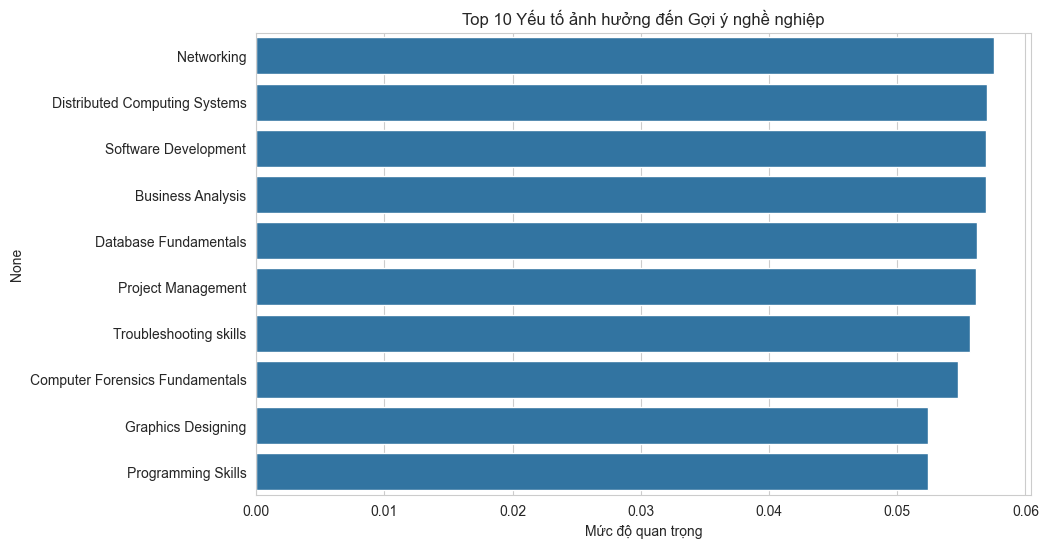

In [16]:
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_imp.head(10), y=feature_imp.head(10).index)
plt.title("Top 10 Yếu tố ảnh hưởng đến Gợi ý nghề nghiệp")
plt.xlabel("Mức độ quan trọng")
plt.show()

-----------------------------------------------------------------------------------------------------------------------------------------------------------------

In [17]:
df = pd.read_csv("/data/cleaned/processed_raw_CareerMapping.csv")

In [18]:
X = df.drop(['Role', 'Role_encoded'], axis=1)

In [19]:
y = df['Role_encoded']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
print(f"Số lượng mẫu ban đầu của tập Train: {Counter(y_train)}")

Số lượng mẫu ban đầu của tập Train: Counter({0: 851, 11: 445, 12: 430, 13: 424, 2: 417, 5: 417, 3: 406, 7: 392, 8: 389, 14: 387, 15: 386, 9: 381, 6: 379, 1: 379, 4: 377, 10: 362})


In [22]:
smote = SMOTE(random_state=42)

In [23]:
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [24]:
print(f"Số lượng mẫu sau khi SMOTE: {Counter(y_train_resampled)}")

Số lượng mẫu sau khi SMOTE: Counter({3: 851, 8: 851, 13: 851, 7: 851, 15: 851, 14: 851, 4: 851, 2: 851, 6: 851, 11: 851, 5: 851, 1: 851, 9: 851, 12: 851, 0: 851, 10: 851})


In [25]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)
y_pred = rf_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)

In [26]:
print(f"Random Forest's acc: {acc}")

Random Forest's acc: 1.0


In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       205
           1       1.00      1.00      1.00        77
           2       1.00      1.00      1.00       123
           3       1.00      1.00      1.00       122
           4       1.00      1.00      1.00        80
           5       1.00      1.00      1.00        99
           6       1.00      1.00      1.00       113
           7       1.00      1.00      1.00       100
           8       1.00      1.00      1.00        91
           9       1.00      1.00      1.00        82
          10       1.00      1.00      1.00        94
          11       1.00      1.00      1.00        95
          12       1.00      1.00      1.00       110
          13       1.00      1.00      1.00       116
          14       1.00      1.00      1.00       105
          15       1.00      1.00      1.00        94

    accuracy                           1.00      1706
   macro avg       1.00   

In [28]:
feature_imp = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

In [29]:
print("\n--- Top 5 Yếu tố quan trọng nhất ---")
print(feature_imp.head(5))


--- Top 5 Yếu tố quan trọng nhất ---
Business Analysis                0.061326
Software Engineering             0.060021
Distributed Computing Systems    0.059983
Computer Architecture            0.058913
Cyber Security                   0.058297
dtype: float64


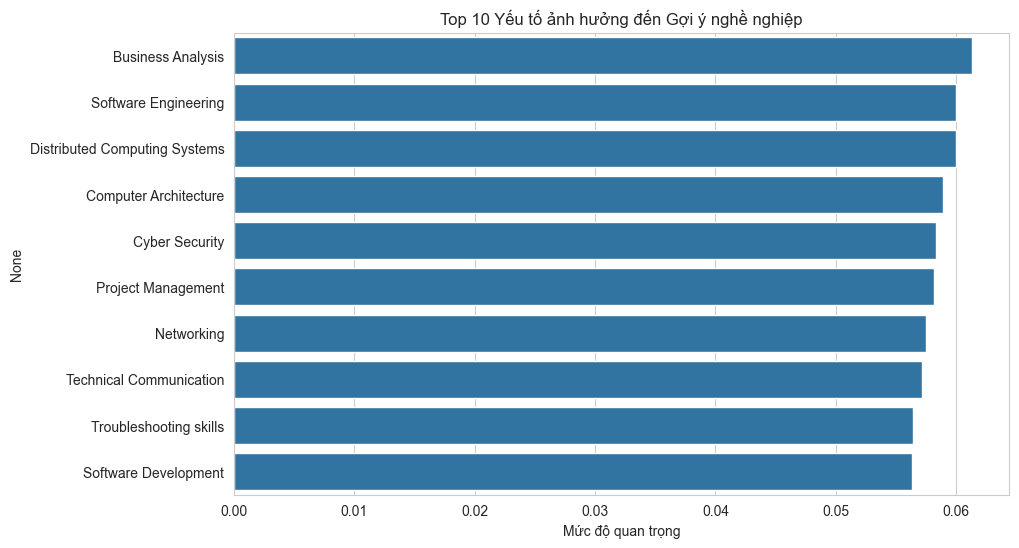

In [30]:
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_imp.head(10), y=feature_imp.head(10).index)
plt.title("Top 10 Yếu tố ảnh hưởng đến Gợi ý nghề nghiệp")
plt.xlabel("Mức độ quan trọng")
plt.show()